# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

Find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. 
Apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Greenfield, Mr. William Bertram",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Find the number of missing values for each column.**


In [ ]:
print('Total Missing Values: ', titanic.isna().sum().values.sum())

print('Columns And Missing Values:')
titanic.isna().sum()

Total Missing Values:  866
Columns And Missing Values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Impute missing values with mean, mode, and constant value**


In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#did not finish
titanic['Age'].fillna((titanic['Age'].mean()), inplace = True)



In [ ]:
#impute the cabin column
titanic['Cabin'].fillna('Other', inplace = True)


In [ ]:
#impute the embarked section
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

In [ ]:
#checking if the imputation worked
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Other,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Other,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Other,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Other,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Other,C


### **Examine the survival rate for passengers from both sexes and 3 classes**


In [ ]:
#pivot table with gender and Pclass
s_class = pd.pivot_table(titanic, values = ['Survived'], index = ['Sex','Pclass'], aggfunc = np.mean, margins = True)
display(s_class)

#insight
print("Females in first class and second class have the highest survival rate. Males in Second Class and Third Class havethe lowest survival rate.")


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447
All            0.383838

Females in first class and second class have the highest survival rate. Males in Second Class and Third Class havethe lowest survival rate.


### **Determine whether 'Age' or 'Fare' are important factors to one's chance of survival?** 


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

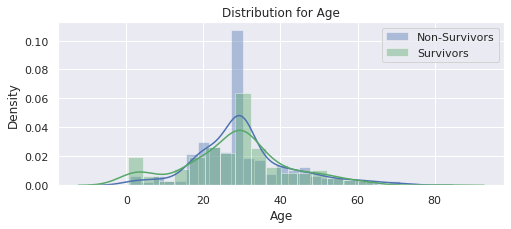

Amongst the survivors, most people are between age 20 to 40. However, the non-survivers have similar age distribution except for 0-10 year-olds.
We can conclude that age is not an important factor when it comes to survival rate.


In [ ]:
#distribution for Age
def distplot(feature, frame):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'b', label='Non-Survivors')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survivors')
    plt.legend()
    plt.show()

display(titanic['Age'].describe())
distplot('Age', titanic)

#insight
print('Amongst the survivors, most people are between age 20 to 40. However, the non-survivers have similar age distribution except for 0-10 year-olds.')
print('We can conclude that age is not an important factor when it comes to survival rate.')

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

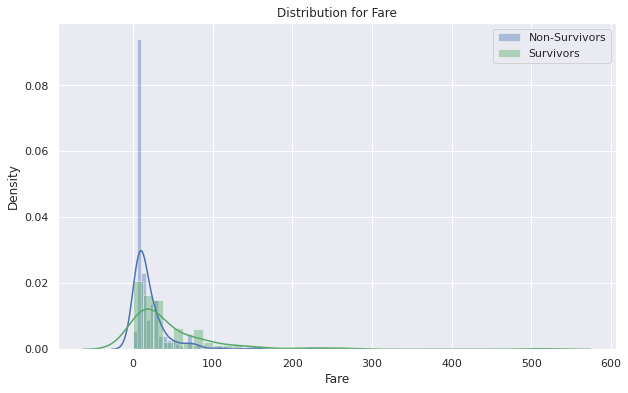

The distribution of survivors and non-survivors are similar, though a lot more non-survivors had lower fares.
People who had higher fares (between 50-150) were more likely to survive.


In [ ]:
#Distribution for fare
def distplot(feature, frame):
    plt.figure(figsize=(10,6))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'b', label='Non-Survivors')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survivors')
    plt.legend()
    plt.show()

display(titanic['Fare'].describe())
distplot('Fare', titanic)

#insight
print('The distribution of survivors and non-survivors are similar, though a lot more non-survivors had lower fares.')
print('People who had higher fares (between 50-150) were more likely to survive.')

### **Calculate and visualize the survival rate for discrete columns 'SibSp' and 'Parch'**


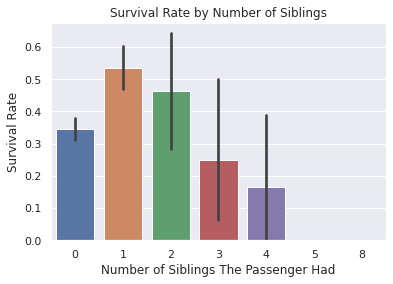

In [ ]:
#Survival Rate for Column SibSp
sns.barplot(x='SibSp', y='Survived', data=titanic)
plt.xlabel('Number of Siblings The Passenger Had')
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Number of Siblings")
plt.show()

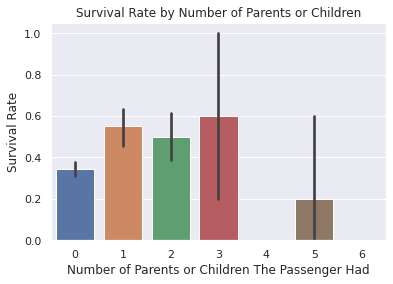

In [ ]:
#Survival Rate by Parch
sns.barplot(x='Parch', y='Survived', data=titanic)
plt.xlabel('Number of Parents or Children The Passenger Had')
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Number of Parents or Children")
plt.show()

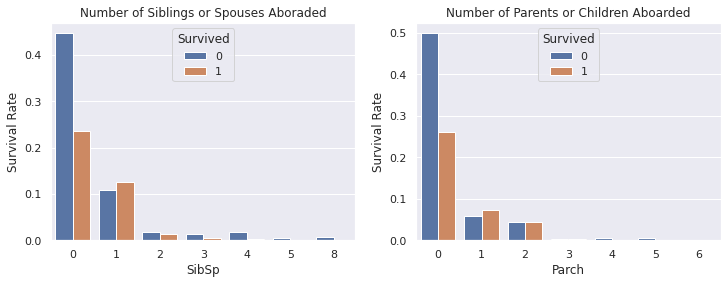

In [ ]:
#SibSp and Parch side by side comparison
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Number of Siblings or Spouses Aboraded")
axis[1].set_title("Number of Parents or Children Aboarded")
axis_y = "Survival Rate"

labels= ['Non-Survivors', 'Survived']
# Plot The SibSp column
gp_sib = titanic.groupby('SibSp')["Survived"].value_counts()/len(titanic)
gp_sib = gp_sib.to_frame().rename({"Survived": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='SibSp', y= axis_y, hue='Survived', data=gp_sib, ax=axis[0])

# Plot the Parch column
gp_par = titanic.groupby('Parch')["Survived"].value_counts()/len(titanic)
gp_par = gp_par.to_frame().rename({"Survived": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Parch', y= axis_y, hue='Survived', data=gp_par, ax=axis[1])

plt.show()

### **Look for the correlations between the feature and target variable 'Survived'**


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,0.247845,0.543351,0.037025,-0.136302,0.086210,0.191981,0.270495,0.106811
Pclass,0.247845,1.000000,0.118133,0.171190,-0.149630,-0.000343,0.079498,0.187437,-0.168091
Sex,0.543351,0.118133,1.000000,0.005005,-0.046152,0.242417,0.137725,0.082104,0.116569
Age,0.037025,0.171190,0.005005,1.000000,0.010067,0.132659,0.117313,0.163002,-0.133308
SibSp,-0.136302,-0.149630,-0.046152,0.010067,1.000000,0.165255,-0.046556,-0.108709,-0.030683
Parch,0.086210,-0.000343,0.242417,0.132659,0.165255,1.000000,0.074306,-0.002761,-0.085059
Fare,0.191981,0.079498,0.137725,0.117313,-0.046556,0.074306,1.000000,0.379659,0.076726
Cabin,0.270495,0.187437,0.082104,0.163002,-0.108709,-0.002761,0.379659,1.000000,0.017685
Embarked,0.106811,-0.168091,0.116569,-0.133308,-0.030683,-0.085059,0.076726,0.017685,1.000000


Sex, Pclass, Cabin, Fare are the most correlated variables with the target variable 'Survived'.


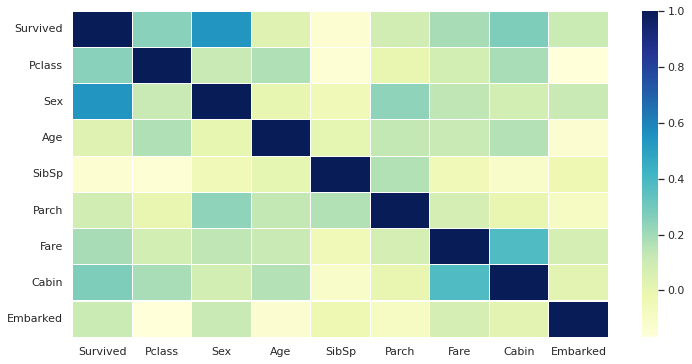

In [ ]:
plt.figure(figsize=(12, 6))
corr = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

#finding
print("Sex, Pclass, Cabin, Fare are the most correlated variables with the target variable 'Survived'." )

### **Insights drawn from analyzing the data**

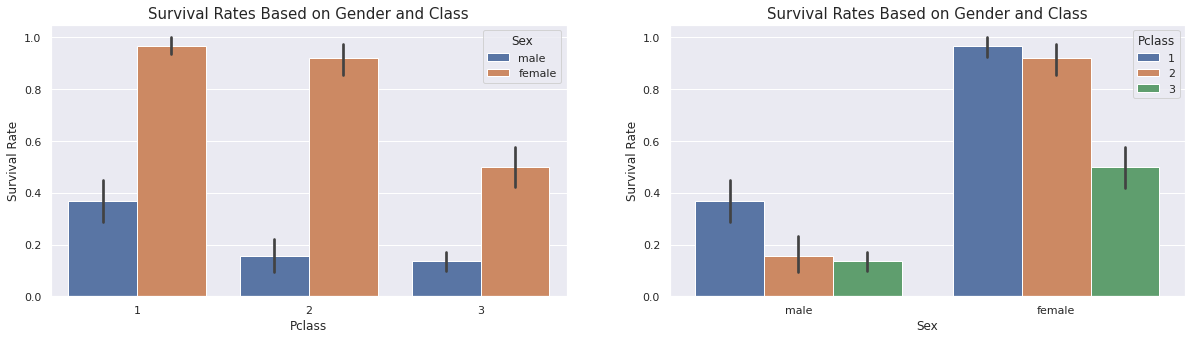

Females have much higher survival rate than males in all 3 classes.
Passengers in Class 1 had the highest survival rate. Females in class 1 and 2 have much higher survival rate than females in class 3.


In [ ]:
plt.figure(figsize = (10, 5))

#male and female survival rate in different classes
plt.subplot(1,2,1)
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanic)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class", size=15)

plt.subplot(1,2,2)
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = titanic)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class", size = 15)
plt.subplots_adjust(right = 1.7)

plt.show()

#insight
print('Females have much higher survival rate than males in all 3 classes.')
print('Passengers in Class 1 had the highest survival rate. Females in class 1 and 2 have much higher survival rate than females in class 3.')

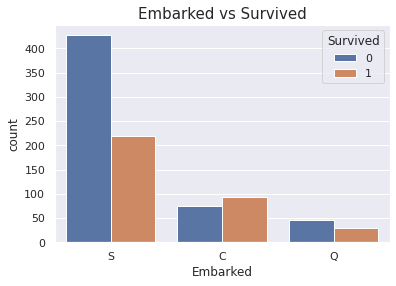

Most passengers who boarded on Southampton and Queenstown did not survive.
Most passengers boarded on Cherbourg survived than those who did not. 


In [ ]:
#count the survivors and non-survivors embarked from different places
sns.countplot(x = 'Embarked',hue = 'Survived' ,data = titanic)
plt.title('Embarked vs Survived', size = 15)
plt.show()

print('Most passengers who boarded on Southampton and Queenstown did not survive.')
print('Most passengers boarded on Cherbourg survived than those who did not. ')

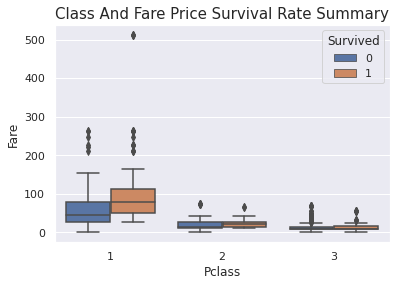

Passengers in first class who paid higher price were more likely to survive.


In [ ]:
#Pclass and Fare Price Summary
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived' ,data = titanic)
plt.title('Class And Fare Price Survival Rate Summary', size = 15)
plt.show()

print('Passengers in first class who paid higher price were more likely to survive.')

### **Logistic Regression Model To Predict Whether A Passenger Would Be A Survivor**
Using [the test dataset](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv) to predict whether a passenger would be a survivor

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#replace with numbers
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

titanic = pd.concat([titanic, sex, embark], axis = 1)

titanic.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace=True)




In [ ]:
#drop the column
titanic.drop(['PassengerId'], axis = 1, inplace=True)

In [ ]:
#organize the test data

t_test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
t_sex = pd.get_dummies(t_test['Sex'],drop_first=True)

t_embark = pd.get_dummies(t_test['Embarked'],drop_first=True)
t_test = pd.concat([t_test, t_sex, t_embark], axis = 1)
t_test.columns

t_test.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace=True)

t_test.columns


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'male', 'Q', 'S'],
      dtype='object')

In [ ]:
#clean the test data
test_x = t_test.drop(['PassengerId','Cabin'], axis = 1)
test_x['Age'].fillna((test_x['Age'].mean()), inplace = True)

In [ ]:
test_x['Fare'].fillna((test_x['Fare'].mean()), inplace = True)

In [ ]:
#fit the model
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male',
       'Q', 'S']
X = titanic[cols]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#The accuracy of the model
model.score(X_train,y_train)

0.8105939004815409

In [ ]:
test_x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50000,0,0,7.8292,1,1,0
1,3,47.00000,1,0,7.0000,0,0,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,1,0,1
4,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,1,0,1
416,3,30.27259,0,0,8.0500,1,0,1


In [ ]:
#predict with the test data
predictions = model.predict(test_x)
final_prediction = pd.DataFrame({'PassengerId':t_test['PassengerId'], 'Survived':predictions})
final_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
